In [55]:
import cv2  # 이미지 데이터 ndarray
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
from torchvision import transforms
from torch.utils.data import DataLoader,Dataset
import torchvision.models as models


import pickle       # 피클(pickle)된 데이터를 역직렬화(deserialize)**하는 함수


from PIL import Image   # 이미지 데이터 JPGImage

In [6]:
DATA_file = r"C:\Users\kjy19\OneDrive\Desktop\Project_image\Data/"
# "C:\Users\kjy19\OneDrive\Desktop\Project_image\Data"
DataList = os.listdir(DATA_file)

for item in DataList: print(item)

BearGGu
ChunSik
GomDyoRi
MangGom
Retriever
Wadada


In [7]:
transConver = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])

In [9]:
imgDS = ImageFolder(root=DATA_file, transform=transConver)

In [10]:
print(f'imgDS.classes        : {imgDS.classes}')
print(f'imgDS.class_to_idx   : {imgDS.class_to_idx}')
print(f'imgDS.targets        : {imgDS.targets}')
for img in imgDS.imgs:
    print(f'imgDS.imgs : {img}')

imgDS.classes        : ['BearGGu', 'ChunSik', 'GomDyoRi', 'MangGom', 'Retriever', 'Wadada']
imgDS.class_to_idx   : {'BearGGu': 0, 'ChunSik': 1, 'GomDyoRi': 2, 'MangGom': 3, 'Retriever': 4, 'Wadada': 5}
imgDS.targets        : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

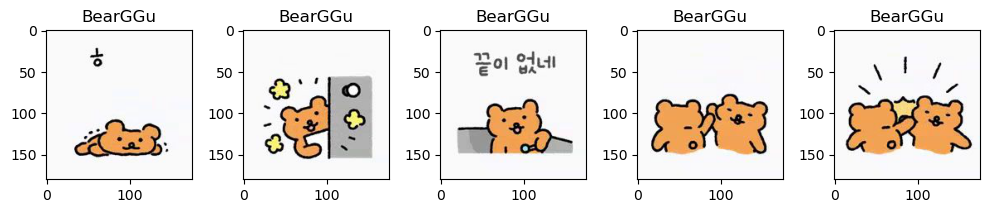

In [12]:
LABEL_NAMES = imgDS.classes

fig, axes=plt.subplots(1,5, figsize=(10, 4))
for idx, (img_data, target) in enumerate(imgDS) :
    axes[idx].imshow(img_data.permute(1,2,0))
    axes[idx].set_title(LABEL_NAMES[target])
    if idx==4: break
plt.tight_layout()
plt.show()

In [37]:
imgDS.imgs[0]

('C:\\Users\\kjy19\\OneDrive\\Desktop\\Project_image\\Data/BearGGu\\2u1033 (1).jpg',
 0)

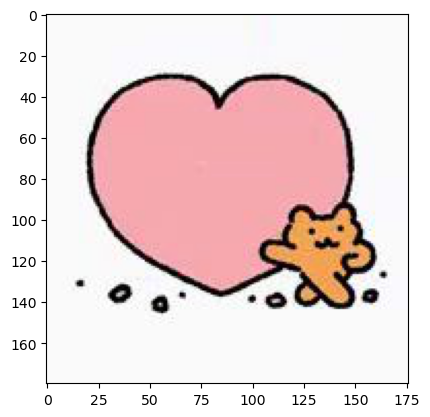

In [40]:
# plt.
img = Image.open(imgDS.imgs[234][0])
# img = np.array(img).astype(float)
plt.imshow(img)    # permute(1,2,0))

In [74]:
imgDS.classes

['BearGGu', 'ChunSik', 'GomDyoRi', 'MangGom', 'Retriever', 'Wadada']

In [44]:
model = models.vgg16(weights = models.VGG16_Weights.IMAGENET1K_V1)

In [45]:
### 사전학습된 모델의 파라미터 비활성화 설정
for named, param in model.named_parameters():
    print(f'[{named}] - {param.shape}')
    # 역전파 시에 업데이트 되지 않도록 설정
    param.requires_grad = False

[features.0.weight] - torch.Size([64, 3, 3, 3])
[features.0.bias] - torch.Size([64])
[features.2.weight] - torch.Size([64, 64, 3, 3])
[features.2.bias] - torch.Size([64])
[features.5.weight] - torch.Size([128, 64, 3, 3])
[features.5.bias] - torch.Size([128])
[features.7.weight] - torch.Size([128, 128, 3, 3])
[features.7.bias] - torch.Size([128])
[features.10.weight] - torch.Size([256, 128, 3, 3])
[features.10.bias] - torch.Size([256])
[features.12.weight] - torch.Size([256, 256, 3, 3])
[features.12.bias] - torch.Size([256])
[features.14.weight] - torch.Size([256, 256, 3, 3])
[features.14.bias] - torch.Size([256])
[features.17.weight] - torch.Size([512, 256, 3, 3])
[features.17.bias] - torch.Size([512])
[features.19.weight] - torch.Size([512, 512, 3, 3])
[features.19.bias] - torch.Size([512])
[features.21.weight] - torch.Size([512, 512, 3, 3])
[features.21.bias] - torch.Size([512])
[features.24.weight] - torch.Size([512, 512, 3, 3])
[features.24.bias] - torch.Size([512])
[features.26.we

In [54]:
imgDS

Dataset ImageFolder
    Number of datapoints: 10535
    Root location: C:\Users\kjy19\OneDrive\Desktop\Project_image\Data/
    StandardTransform
Transform: Compose(
                 ToImage()
                 ToDtype(scale=True)
           )

In [67]:
imgDS_size = len(imgDS)
train_size = int(0.8 * imgDS_size)  # 80% 학습 데이터
test_size = imgDS_size - train_size  # 20% 테스트 데이터

# 학습 및 테스트 데이터셋으로 분할
train_dataset, test_dataset = random_split(imgDS, [train_size, test_size])

# 데이터 로더 설정 (배치 크기는 32로 예시)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=6, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=6, shuffle=False)

In [68]:
import torch.optim as optim
reqloss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [73]:
idx = 0
for images, labels in train_loader:
    print(images, labels)
    idx+=1
    if idx==5:
        break

tensor([[[[0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          ...,
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804]],

         [[0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          ...,
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804]],

         [[0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0

In [ ]:
# EPOCH = 10
# BATCH_SIZE = 32
# LOSS_HISTORY, SCORE_HISTORY = [[],[]], [[],[]]
# CNT = imgDS.n_rows/BATCH_SIZE
# print(f'CNT => {CNT}')

# ## 학습 모니터링 / 스케쥴링 설정
# # => LOSS_HISTORY, SCORE_HISTORY 활용
# # => 임계기준 : 10번
# BREAK_CNT = 0

# for epoch in range(EPOCH):
#     # 학습 모드로 모델 설정
#     model.train()

#     # 배치 크기 만큼 데이터 로딩해서 학습 진행
#     score_total, loss_total = 0,0
#     for featureTS, targetTS in train_loader:
#         # 학습 진행
#         pre_y = model(featureTS)

#         # 손실 계산
#         loss = reqloss(pre_y, targetTS)
#         loss_total += loss.item()
#         # 성능평가 개선
#         score = reqloss()(pre_y,targetTS)
#         score_total += score.item()

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     # 에포크 당 검증기능
#     # 모델 검증 모드 설정
#     model.eval()
#     with torch.no_grad():

#         # 에포크 당 손실값과 성능평가값 저장
#         # 검증 데이터셋 
#         # 일부 뽑기 ....을마나 뽑을까 ... ㅎㅎ,ㅔ헤헤ㅔ
#         val_featureTS = torch.FloatTensor(valDS.featureDF.values)
#         val_targetTS = torch.FloatTensor(valDS.targetDF.values)
#         # 평가
#         pre_val = model(val_featureTS)
#         # 손실
#         loss_val = reqloss(pre_val, val_targetTS)
#         # 성능평가
#         score_val = R2Score()(pre_val, val_targetTS)


#     # 최적화 스케쥴러 인스턴스 업데이트
#     # scheduler.step(loss_val)  # 최소값이 좋은 것.
#     scheduler.step(score_val)   # 최댓값 해야함 scheduler에 모드 max 추가.
    
#     print(f'scheduler.num_bad_epochs {scheduler.num_bad_epochs}', end=" ")
#     print(f'scheduler.patience {scheduler.patience}')
#     # 손실 감소 (또는 성능 개선)이 안되는 경우 조기종료
#     if scheduler.num_bad_epochs >= scheduler.patience:
#         print(f'{scheduler.patience}EPOCH 성능 개선이 없어 조기종료함')
#         break

In [70]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 학습 루프
num_epochs = 10  # 학습할 에폭 수

for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        # 이미지와 레이블을 장치로 이동 (GPU 사용 시)
        images, labels = images.to(device), labels.to(device)

        # 옵티마이저의 기울기 초기화
        optimizer.zero_grad()

        # 모델에 이미지 데이터를 입력하여 예측값 도출
        outputs = model(images)

        # 손실 계산
        loss = reqloss(outputs, labels)

        # 역전파(Backpropagation) 수행
        loss.backward()

        # 가중치 업데이트
        optimizer.step()

        # 손실과 정확도 기록
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    # 에폭당 평균 손실 및 정확도 출력
    epoch_loss = running_loss / len(train_loader)
    accuracy = 100.0 * correct / total
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%')


IndexError: Target 5 is out of bounds.